# Name: Ayush Jain
# Email: ayushjain051001@gmail.com
# Phone No: 8560036606

# Question Classification
Write a python script to take file input which will contain a sentence per line. For each
sentence you have to identify if it’s a question or not by detecting question phrases like what,
how etc. and tag it yes or no. 

Write tagged data into another output file
Below is a link to a file containing sample sentences. You can test your script on this:-
https://drive.google.com/file/d/1LAB9zMwDRZgTEVubTcp_Ctpa2ErKZ3Pj/view?usp=sharing

Format of input file:-
Hello how are you doing

My name is Joe

I am going home

Format of output file:-
Hello how are you doing   Yes

My name is Joe            No

I am going home           No


 - Download nps_chat from nltk which includes the chat details available in nltk library.

 - Download punkt from nltk which helps in tokenization of text into sentences.

## Importing the Libraries required

In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt

In [ ]:
# run only if not downloaded
nltk.download('nps_chat')
nltk.download('punkt')

### Reading all the data from the file.

In [2]:
filepath = 'data.txt'
text = []
with open(filepath) as fp:
    line = fp.readline()
    while line:
        text.append(line.replace('\n',''))
        line = fp.readline()

In [3]:
text[:10]

['hindi movies for adults',
 'are panda dogs real',
 'asuedraw winning numbers',
 'sentry replacement keys',
 'rebuilding nicad battery packs',
 'can you overdose on melatonin',
 'list of browsers',
 'que son numeros naturales',
 'mini motos honda',
 'mulatto']

### Extarcting data from the posts.

In [4]:
posts = nltk.corpus.nps_chat.xml_posts()

In [5]:
# we create a function which extracts features from the posts
def dialogue_features(post):
    # a dictionary which will take all the details of the post
    features = {}
    # we tokenize the content of the post
    for word in nltk.word_tokenize(post):
        features['contains({})'.format(word.lower())] = True
    # return the dictionary with the data
    return features

In [6]:
# we create a list of tuple with the text and the class of the text
featureSets = [(dialogue_features(post.text), post.get('class')) for post in posts]

In [43]:
# check number of posts
len(featureSets)

10567

In [7]:
# we make take 20% of the data for the testing purpose and 80% for training
size = int(len(featureSets) * 0.2)
train_set, test_set = featureSets[size:], featureSets[:size]

### Testing Maxent and Naive Bayes Algorithm

#### Maxent Classifier

In [8]:
# we create a Maxent Classifier which trains the model for 15 iterations
classifier1 = nltk.MaxentClassifier.train(train_set, max_iter=15)

  ==> Training (15 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -2.70805        0.051
             2          -1.24488        0.857
             3          -0.91412        0.891
             4          -0.74260        0.905
             5          -0.62950        0.917
             6          -0.54642        0.924
             7          -0.48235        0.927
             8          -0.43205        0.933
             9          -0.39230        0.937
            10          -0.36064        0.941
            11          -0.33505        0.945
            12          -0.31394        0.949
            13          -0.29617        0.952
            14          -0.28095        0.954
         Final          -0.26773        0.955


In [9]:
# we print the accuracy attainded by the model on test data
print(nltk.classify.accuracy(classifier1, test_set))

0.7179365830572646


#### Naive Bayes Classifier

In [10]:
# we create a Naive Bayes classifer from the training set, where we pass text and label
classifier2 = nltk.NaiveBayesClassifier.train(train_set)

In [11]:
# we print the accuracy achieved by Naive bayes on the test data
print(nltk.classify.accuracy(classifier2, test_set))

0.6630383341221012


#### Decision Tree Classifier

In [12]:
# we create a Decision Tree classifer from the training set, where we pass text and label
classifier3 = nltk.classify.decisiontree.DecisionTreeClassifier.train(train_set)

In [13]:
# we print the accuracy achieved by Decision Tree on the test data
print(nltk.classify.accuracy(classifier3, test_set))

0.7666824420255561


### Providing selected question types.

The function will return true if NLTK model classifies the given text into whquestion or ynquestion category, else will return false.

In [14]:
# we specify the types of text which is required for our problem
questionTypes = ["whQuestion","ynQuestion"]
# we create a function of text classification using nltk model
def isQuestionNltk(ques):
    # we extract the text part and classify the data using the model
    questionType = classifier3.classify(dialogue_features(ques))
    # if the label or category returned by model is a question then we return true, else false
    return questionType in questionTypes

### Adding an extra layer of questions for attaining better accuracy.
### It will take care of the cases which are missed by the NLTK model.

In [15]:
questionPattern = ["do i", "do you", "what", "who", "is it", "why","would you", "how","is there",
                    "are there", "is it so", "is this true" ,"to know", "is that true", "are we", "am i", 
                   "question is", "tell me more", "can i", "can we", "tell me", "can you explain",
                   "question","answer", "questions", "answers", "ask"]

In [16]:
# hepling verbs which works in the supporting role.
helpingVerbs = ["is","am","can", "are", "do", "does"]

### Creating a final function, which will classify that the text is a question or not

In [17]:
# creating a function which will take the text and tell that it is a question or not
def isQuestion(data):
    # we convert the data to lowercase and remove leading and trailing spaces
    data = data.lower().strip()
    # we classify the data using the NLTK model, if it is classified as a question by nltk we
    # return True else we go for in depth check of the text
    if not isQuestionNltk(data):
        isQues = False
        # check if any of pattern exist in sentence
        for pattern in questionPattern:
            # check that each pattern is their in the question or not.
            isQues = pattern in data
            # if pattern is found in question, change the value to true and break
            if isQues:
                break

        # We divide multiple sentences using . as a delimeter
        sentences = data.split(".")
        # we iteratre through all the sentences
        for sentence in sentences:
            # we check that the sentence is not empty
            if len(sentence.strip()):
                # we tokenize the the sentence using the nltk and extarct the first work
                firstWord = nltk.word_tokenize(sentence)[0]
                # if question ends with ? or start with any helping verb, then it is question
                if sentence.endswith("?") or firstWord in helpingVerbs:
                    isQues = True
                    # we then break from the loop
                    break
        # we return the value true or false which is obtained by in depth search
        return isQues    
    else:
        # we return true as it has been classified as a question by nltk model only
        return True

### Testing with some values

In [18]:
isQuestion('am i male')

True

In [19]:
isQuestion('How are You')

True

In [20]:
isQuestion('I am Fine')

False

### Classifying all the text 

In [21]:
# we create a dataframe which will have all the text and label
data = pd.DataFrame({'Sentence':text})

In [32]:
# we create an anonymous function using isQuestion function which will return Yes or no according to the text
data['IsQuestion'] = data['Sentence'].apply(lambda x: 'Yes' if isQuestion(x) else 'No')

In [33]:
data.head()

,Sentence,IsQuestion
0,hindi movies for adults,No
1,are panda dogs real,Yes
2,asuedraw winning numbers,No
3,sentry replacement keys,No
4,rebuilding nicad battery packs,No


In [34]:
data.shape

(9993, 2)

In [35]:
# we find out the distribution of the labels
data.IsQuestion.value_counts()

No     8962
Yes    1031
Name: IsQuestion, dtype: int64

<AxesSubplot:ylabel='IsQuestion'>

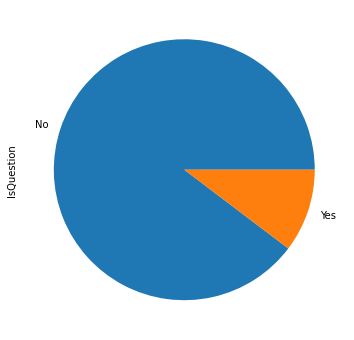

In [38]:
# we visualize the results
plt.figure(figsize=(6,6))
data.IsQuestion.value_counts().plot(kind='pie')

<AxesSubplot:>

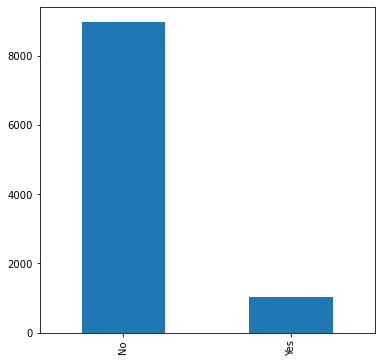

In [39]:
# we visualize the results
plt.figure(figsize=(6,6))
data.IsQuestion.value_counts().plot(kind='bar')

In [41]:
# we see the dataframe with the text and label
data.head()

,Sentence,IsQuestion
0,hindi movies for adults,No
1,are panda dogs real,Yes
2,asuedraw winning numbers,No
3,sentry replacement keys,No
4,rebuilding nicad battery packs,No


In [42]:
# we save the data to a csv file which will contain the sentence and answer that it is a question or not.
data.to_csv('Solution.csv')

## Inference
We have created a model which will classify that the given text is a question or not. We use NLTK Library for creating the model. We use the NPS chat data for training as it contains the text classified into proper labels. We extract the text and labels from the posts. We use different algorithms such as Decision Tree, Naive Bayes, and Maxent and identified that Decision Tree gives us the best accuracy. We attained an accuracy of around 76% using the Decision Tree Model. We use the Decision Tree classfier of nltk and created a function which will predict that the text is a question or not. We optimized the function by adding some use cases which are not covered by the algorithm to improve the performance. In the end, we applied the function to all the rows using lamda and apply functions and saved the result in a dataframe. We visualized the results and saved it in an csv file for future reference.